# Imports

In [4862]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Models

from sklearn.model_selection import train_test_split
from IPython.display import display

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

# Plot Decision Tree
from sklearn import tree

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4863]:
data = pd.read_csv('/content/startup data.csv')

# data analysis

In [4864]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4865]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [4866]:
pd.set_option("display.max_columns",None)

In [4867]:
data.head(8)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired


In [4868]:
successful_startups = data[data['status'] == 'acquired']
successful_startups.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired


In [4869]:
industries = successful_startups['category_code'].unique()
industries

array(['music', 'enterprise', 'web', 'software', 'finance', 'mobile',
       'education', 'games_video', 'public_relations', 'photo_video',
       'hardware', 'ecommerce', 'advertising', 'fashion', 'analytics',
       'consulting', 'cleantech', 'security', 'search', 'semiconductor',
       'social', 'network_hosting', 'biotech', 'medical', 'automotive',
       'messaging', 'hospitality', 'news', 'transportation', 'sports',
       'real_estate', 'travel', 'other', 'health'], dtype=object)

In [4870]:
industries_count = successful_startups['category_code'].value_counts().to_numpy()
industries_count

array([101,  93,  56,  52,  45,  31,  24,  24,  22,  16,  15,  11,  11,
        10,  10,   8,   7,   7,   7,   7,   6,   5,   5,   4,   4,   3,
         3,   2,   2,   2,   1,   1,   1,   1])

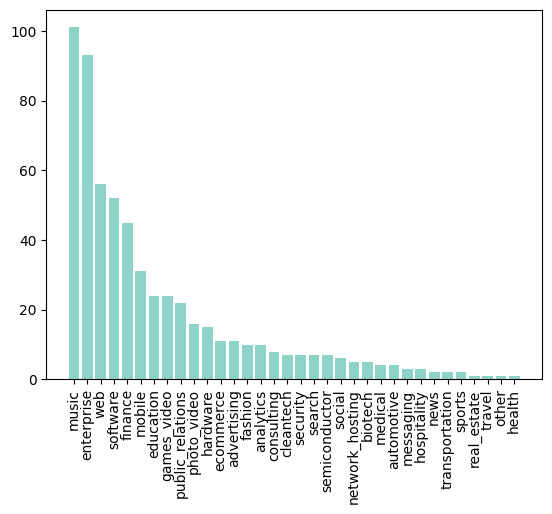

In [4871]:
plt.bar(industries,industries_count)
plt.xticks(rotation=90)
plt.show()

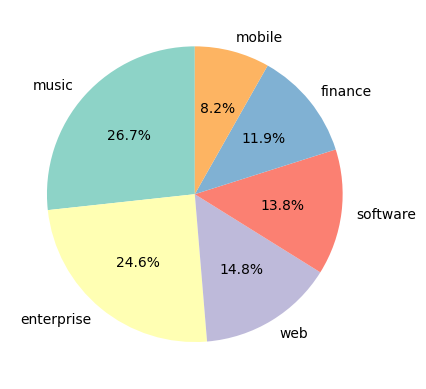

In [4872]:
threshold = 30
filtered_labels = [label for label, size in zip(industries, industries_count) if size >= threshold]
filtered_sizes = [size for size in industries_count if size >= threshold  ]
plt.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [4873]:
industries_all = data['category_code'].unique()

In [4874]:
industries_count_all = data['category_code'].value_counts().to_numpy()

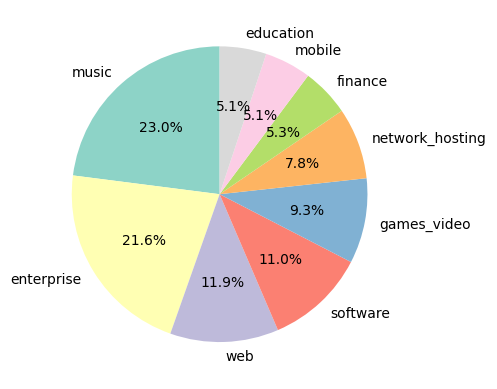

In [4875]:
threshold = 30
filtered_labels = [label for label, size in zip(industries_all, industries_count_all) if size >= threshold ]
filtered_sizes = [size for size in industries_count_all if size >= threshold ]
plt.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
plt.show()

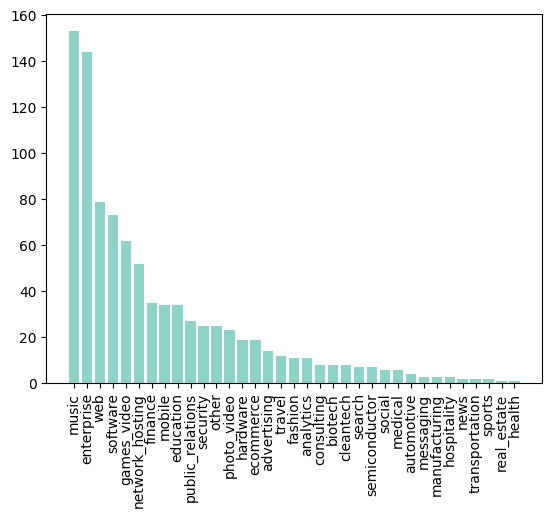

In [4876]:
plt.bar(industries_all,industries_count_all)
plt.xticks(rotation=90)
plt.show()

In [4877]:
industries_count

array([101,  93,  56,  52,  45,  31,  24,  24,  22,  16,  15,  11,  11,
        10,  10,   8,   7,   7,   7,   7,   6,   5,   5,   4,   4,   3,
         3,   2,   2,   2,   1,   1,   1,   1])

In [4878]:
industries_count_all.copy()

array([153, 144,  79,  73,  62,  52,  35,  34,  34,  27,  25,  25,  23,
        19,  19,  14,  12,  11,  11,   8,   8,   8,   7,   7,   6,   6,
         4,   3,   3,   3,   2,   2,   2,   1,   1])

In [4879]:
industries_successrate =industries_count.copy()
industries_successrate.size

34

In [4880]:
for i in range(industries_count.size):
   industries_successrate[i]=(industries_count[i]/industries_count_all[i]) *100
industries_successrate

array([ 66,  64,  70,  71,  72,  59,  68,  70,  64,  59,  60,  44,  47,
        52,  52,  57,  58,  63,  63,  87,  75,  62,  71,  57,  66,  50,
        75,  66,  66,  66,  50,  50,  50, 100])

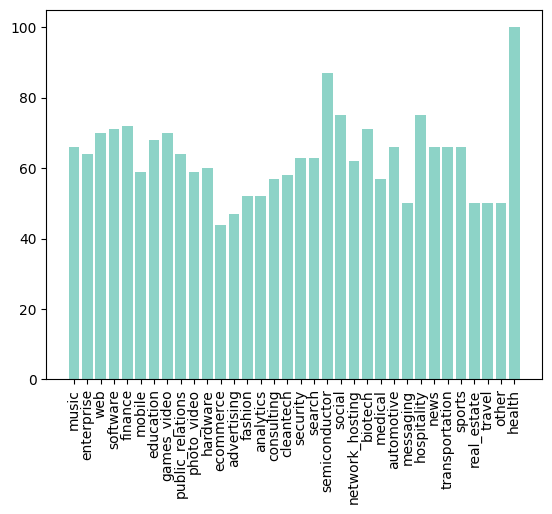

In [4881]:
plt.bar(industries,industries_successrate)
plt.xticks(rotation=90)
plt.show()

# data clean

**Nulls**

In [4882]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4883]:
data.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate               

In [4884]:
for col in data.columns:
  print(col)
  print(f'First 5 unique values: {data[col].unique()[:5]}')
  print(f'Number of unique values: {data[col].nunique()}\n')

Unnamed: 0
First 5 unique values: [1005  204 1001  738 1002]
Number of unique values: 923

state_code
First 5 unique values: ['CA' 'MA' 'KY' 'NY' 'CO']
Number of unique values: 35

latitude
First 5 unique values: [42.35888  37.238916 32.901049 37.320309 37.779281]
Number of unique values: 652

longitude
First 5 unique values: [ -71.05682  -121.973718 -117.192656 -122.05004  -122.419236]
Number of unique values: 651

zip_code
First 5 unique values: ['92101' '95032' '92121' '95014' '94105']
Number of unique values: 382

id
First 5 unique values: ['c:6669' 'c:16283' 'c:65620' 'c:42668' 'c:65806']
Number of unique values: 922

city
First 5 unique values: ['San Diego' 'Los Gatos' 'Cupertino' 'San Francisco' 'Mountain View']
Number of unique values: 221

Unnamed: 6
First 5 unique values: [nan 'San Diego CA 92121' 'Cupertino CA 95014' 'San Francisco CA 94105'
 'Mountain View CA 94043']
Number of unique values: 252

name
First 5 unique values: ['Bandsintown' 'TriCipher' 'Plixi' 'Solidcore Syst

In [4885]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [4886]:
data.drop(['Unnamed: 6','Unnamed: 0','is_CA','is_NY',	'is_MA','is_TX','is_otherstate',
             'is_enterprise','is_advertising',
             'is_ecommerce','is_biotech','is_consulting',
             'has_VC','has_angel','has_roundA','has_roundB','has_roundC',
           'has_roundD','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','labels','state_code','object_id','zip_code','id'],axis=1, inplace=True)

<ipython-input-4887-cc58aaab7bf7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="Blues")


<Axes: >

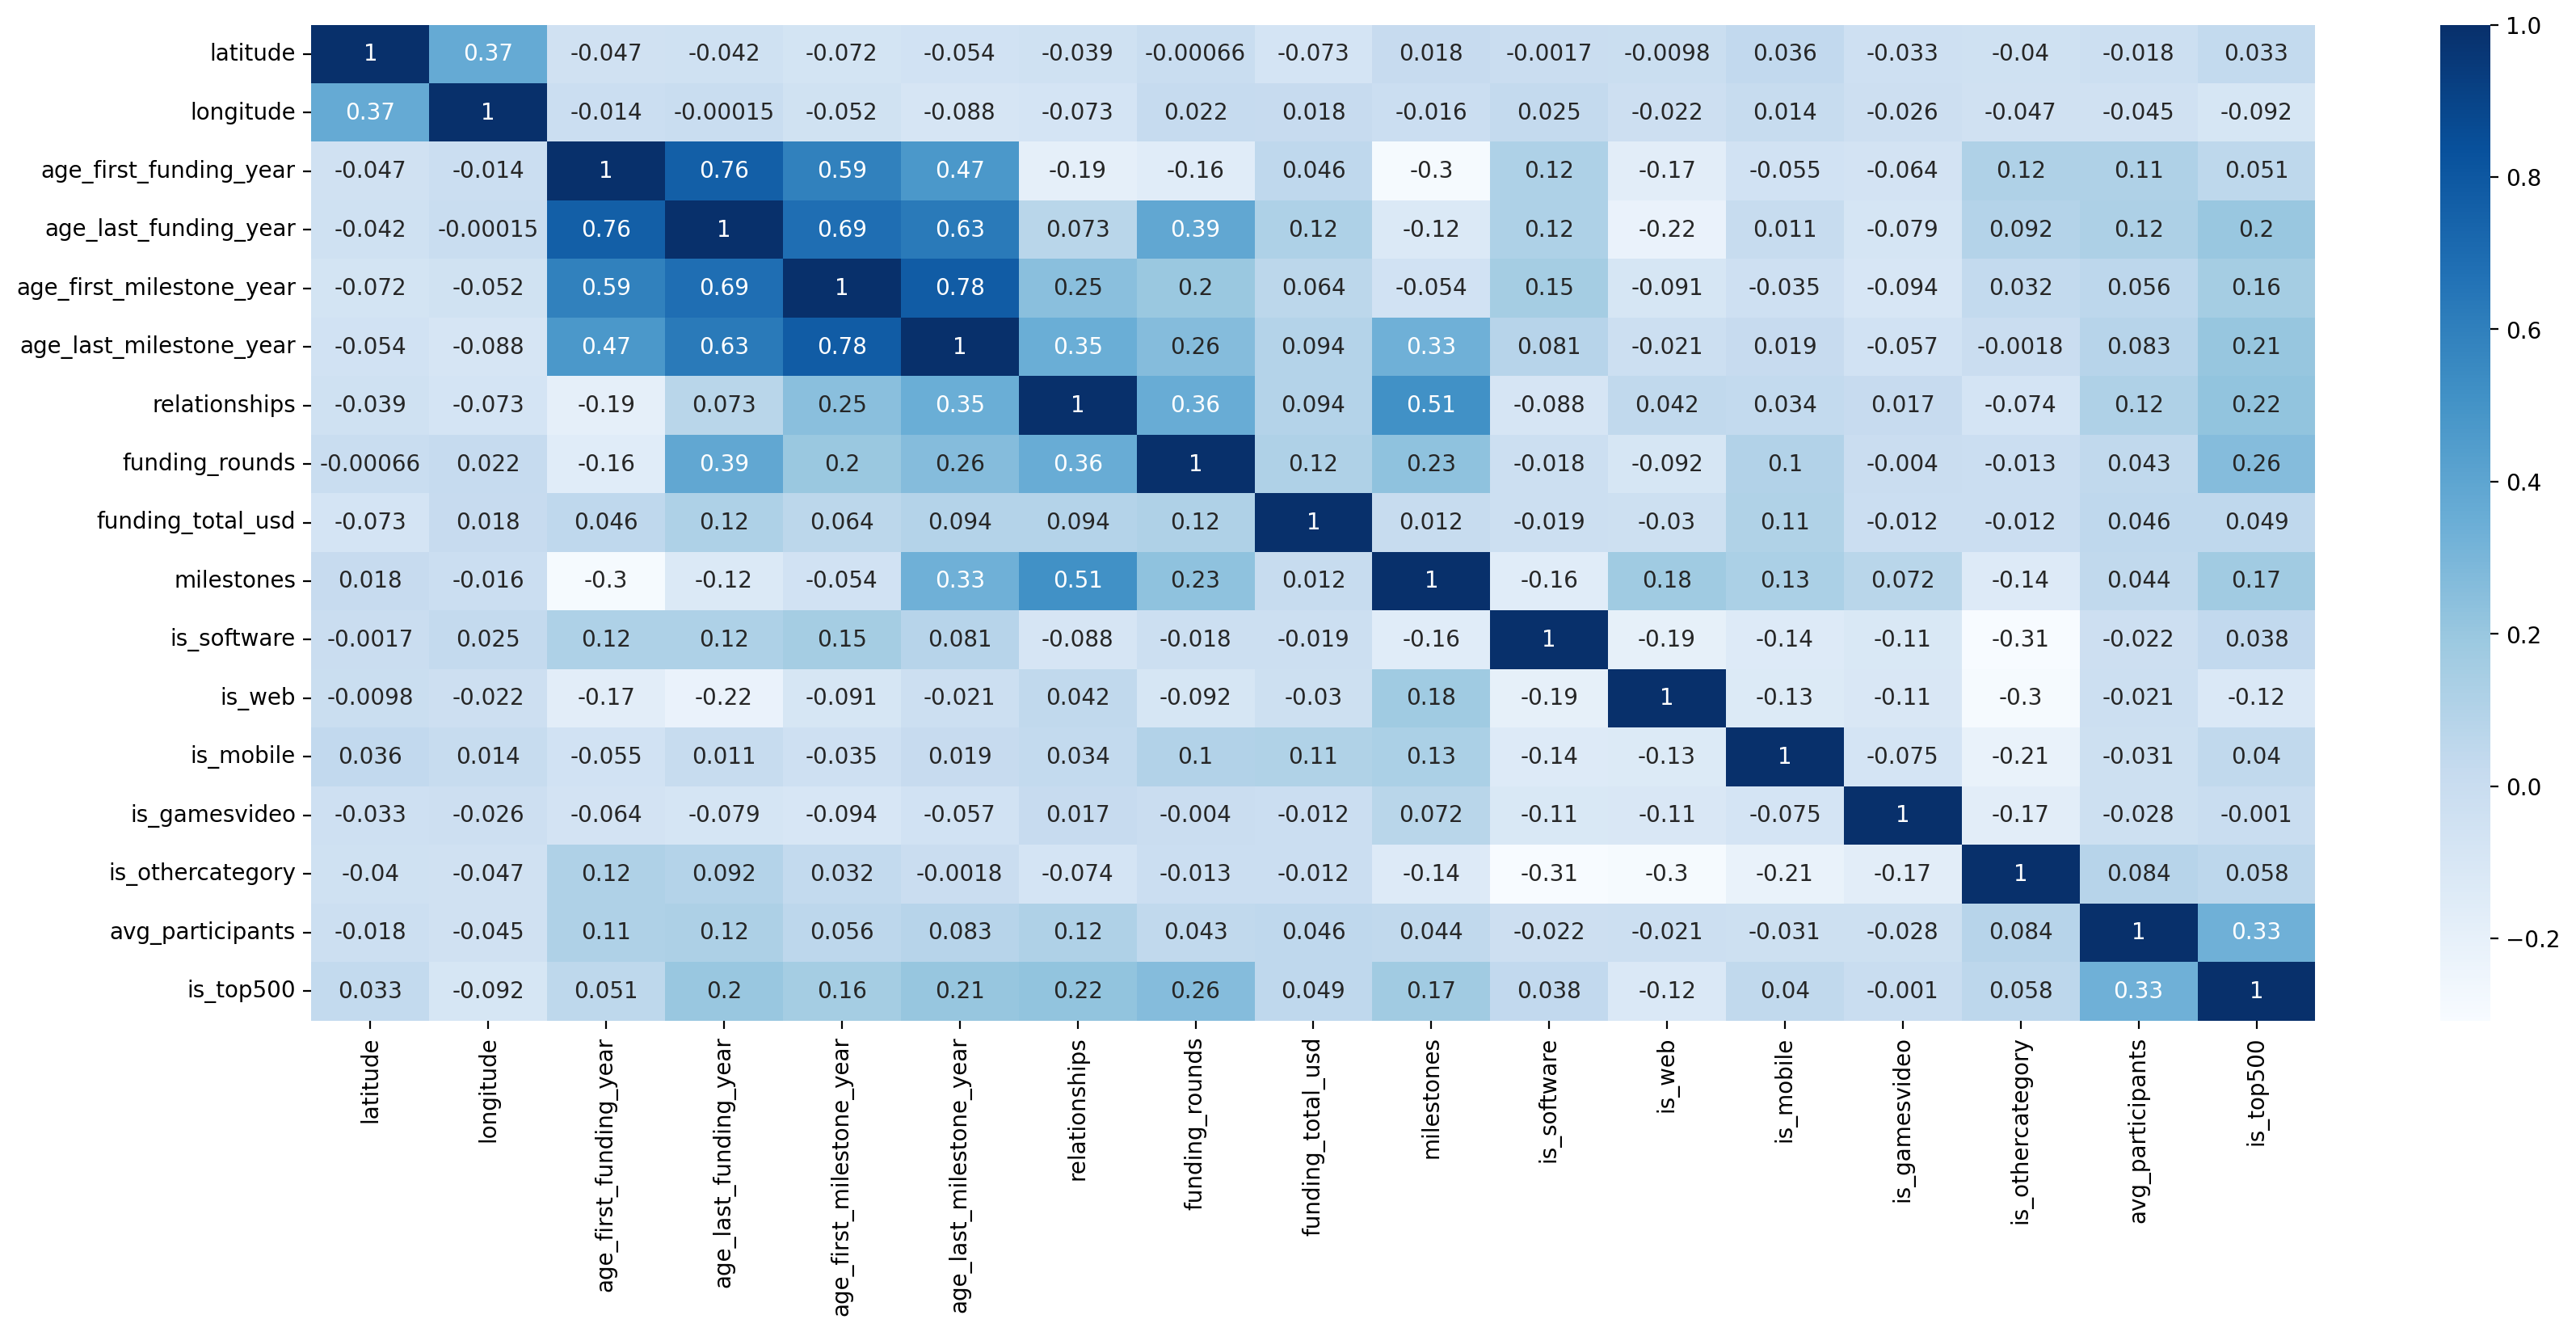

In [4887]:
fig, axes = plt.subplots(figsize=(20, 8),dpi=200)
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [4888]:
data

,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,is_web,is_mobile,is_gamesvideo,is_othercategory,avg_participants,is_top500,status
0,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,0,0,0,1,1.0000,0,acquired
1,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,0,0,0,0,4.7500,1,acquired
2,32.901049,-117.192656,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,1,0,0,0,4.0000,1,acquired
3,37.320309,-122.050040,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,1,0,0,0,0,3.3333,1,acquired
4,37.779281,-122.419236,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,0,0,0,1,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,San Francisco,CoTweet,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,advertising,0,0,0,0,0,6.0000,1,acquired
919,42.504817,-71.195611,Burlington,Reef Point Systems,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,security,0,0,0,0,1,2.6667,1,closed
920,37.408261,-122.015920,Sunnyvale,Paracor Medical,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,biotech,0,0,0,0,0,8.0000,1,closed
921,37.556732,-122.288378,San Francisco,Causata,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,software,1,0,0,0,0,1.0000,1,acquired


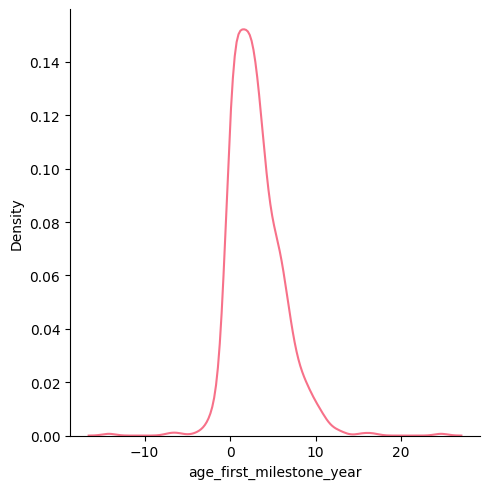

In [4889]:
sns.set_palette("husl")
sns.displot(data=data, x="age_first_milestone_year", kind="kde")

In [4890]:
test=data.copy()

In [4891]:
test["age_first_milestone_year"].fillna(test["age_first_milestone_year"].mean(), inplace=True)

In [4892]:
test["age_first_milestone_year"].isna().sum()

0

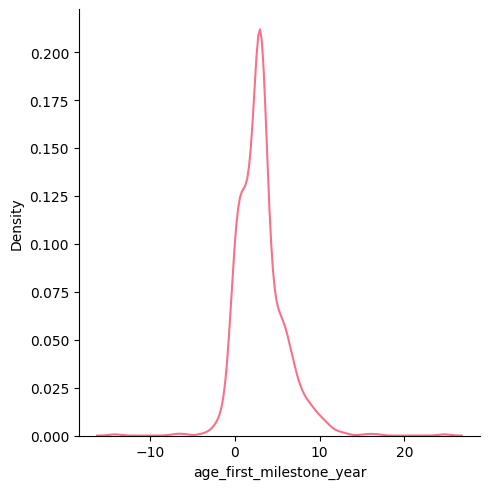

In [4893]:
sns.set_palette("husl")
sns.displot(data=test, x="age_first_milestone_year", kind="kde")

In [4894]:
test2=data.copy()

In [4895]:
test2["age_first_milestone_year"].isna().sum()

152

In [4896]:
test2["age_first_milestone_year"].fillna(test2["age_first_milestone_year"].median(), inplace=True)

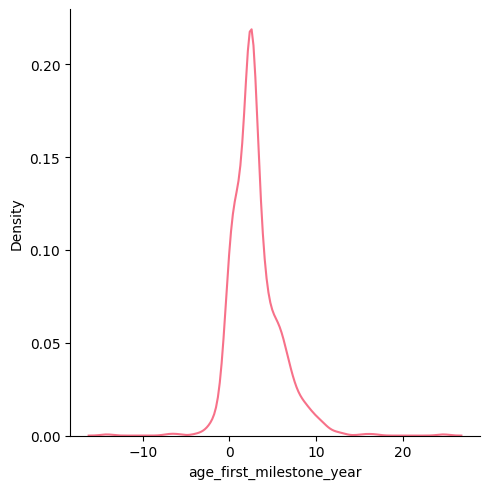

In [4897]:
sns.set_palette("husl")
sns.displot(data=test2, x="age_first_milestone_year", kind="kde")

In [4898]:
data["age_first_milestone_year"].fillna(data["age_first_milestone_year"].median(), inplace=True)

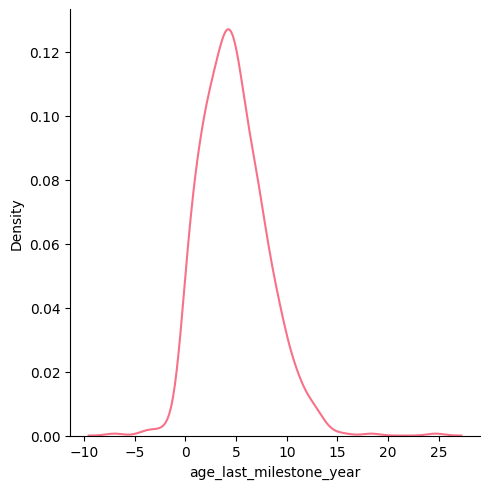

In [4899]:
sns.set_palette("husl")
sns.displot(data=data, x="age_last_milestone_year", kind="kde")

In [4900]:
test["age_last_milestone_year"].fillna(test["age_last_milestone_year"].mean(), inplace=True)

In [4901]:
test["age_last_milestone_year"].isna().sum()

0

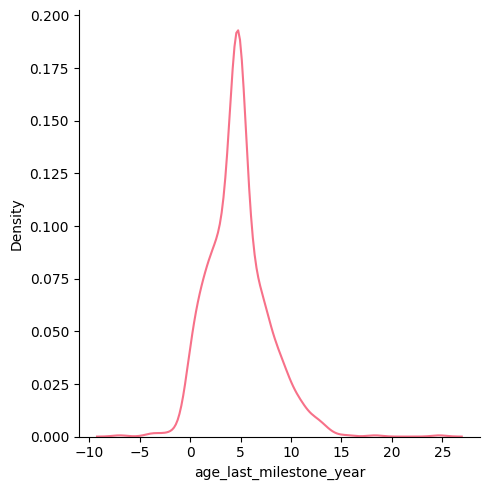

In [4902]:
sns.set_palette("husl")
sns.displot(data=test, x="age_last_milestone_year", kind="kde")

In [4903]:
test2["age_last_milestone_year"].fillna(test2["age_last_milestone_year"].median(), inplace=True)

In [4904]:
test2["age_last_milestone_year"].isna().sum()

0

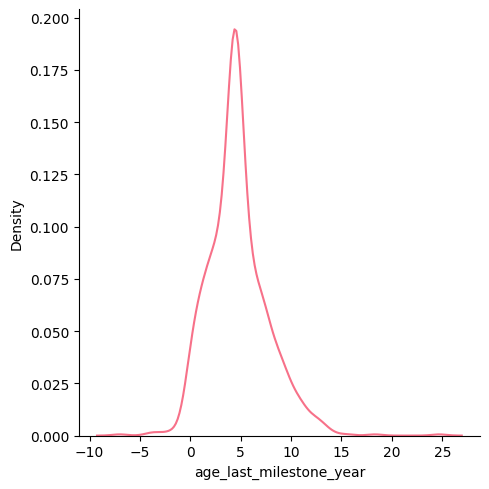

In [4905]:
sns.set_palette("husl")
sns.displot(data=test2, x="age_last_milestone_year", kind="kde")

In [4906]:
data["age_last_milestone_year"].fillna(data["age_last_milestone_year"].median(), inplace=True)

In [4907]:
data=data.dropna()

In [4908]:
data.isnull().sum()

latitude                    0
longitude                   0
city                        0
name                        0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_gamesvideo               0
is_othercategory            0
avg_participants            0
is_top500                   0
status                      0
dtype: int64

In [4909]:
data

,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,is_web,is_mobile,is_gamesvideo,is_othercategory,avg_participants,is_top500,status
0,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,0,0,0,1,1.0000,0,acquired
1,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,0,0,0,0,4.7500,1,acquired
2,32.901049,-117.192656,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,1,0,0,0,4.0000,1,acquired
3,37.320309,-122.050040,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,1,0,0,0,0,3.3333,1,acquired
4,37.779281,-122.419236,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,0,0,0,1,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,San Francisco,CoTweet,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,advertising,0,0,0,0,0,6.0000,1,acquired
919,42.504817,-71.195611,Burlington,Reef Point Systems,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,security,0,0,0,0,1,2.6667,1,closed
920,37.408261,-122.015920,Sunnyvale,Paracor Medical,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,biotech,0,0,0,0,0,8.0000,1,closed
921,37.556732,-122.288378,San Francisco,Causata,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,software,1,0,0,0,0,1.0000,1,acquired


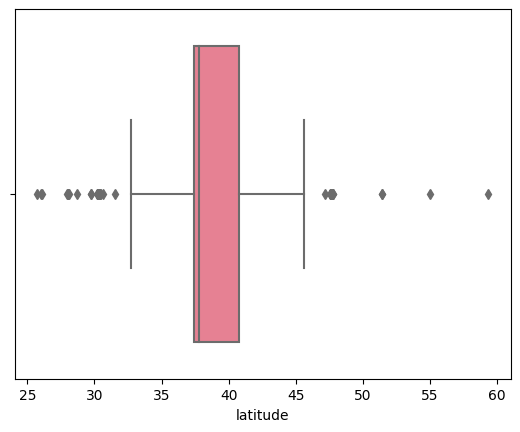

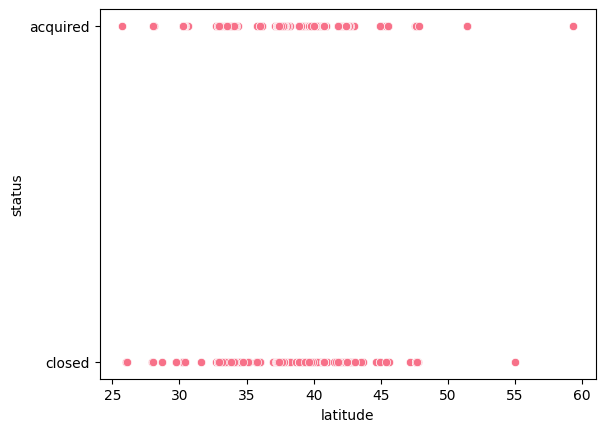

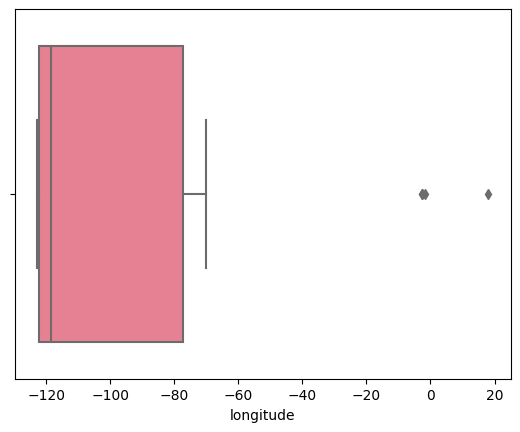

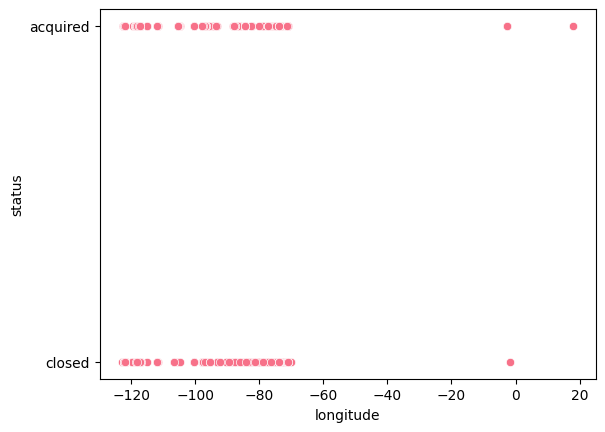

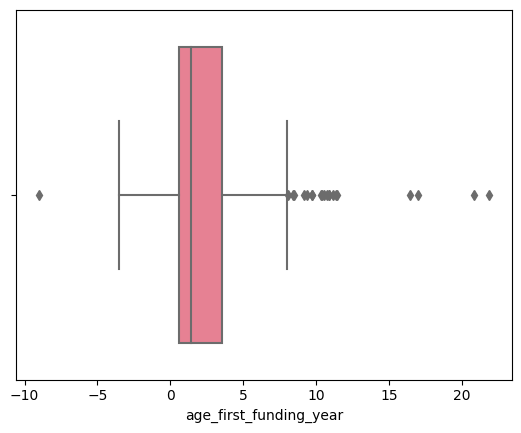

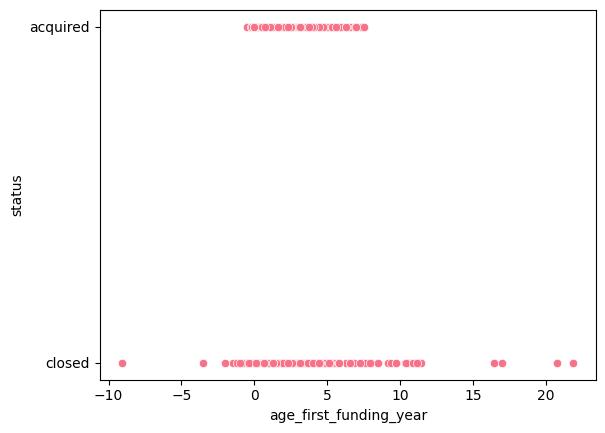

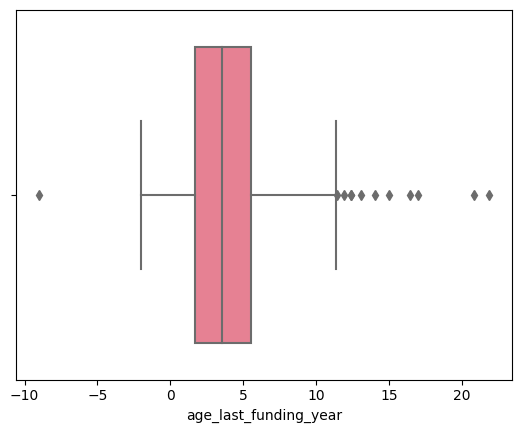

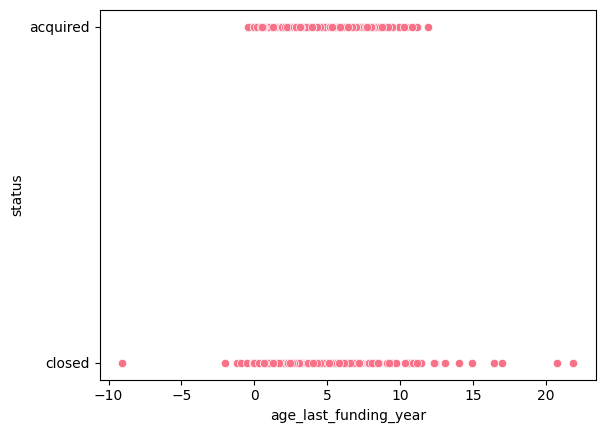

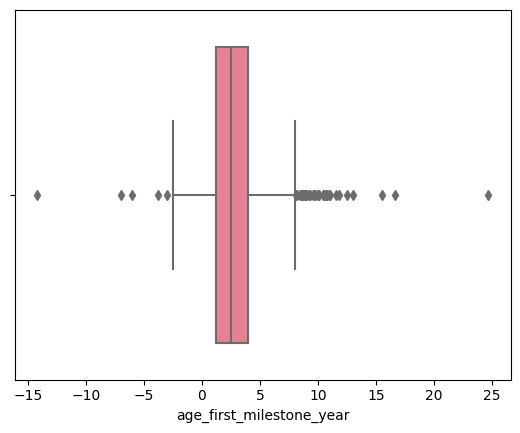

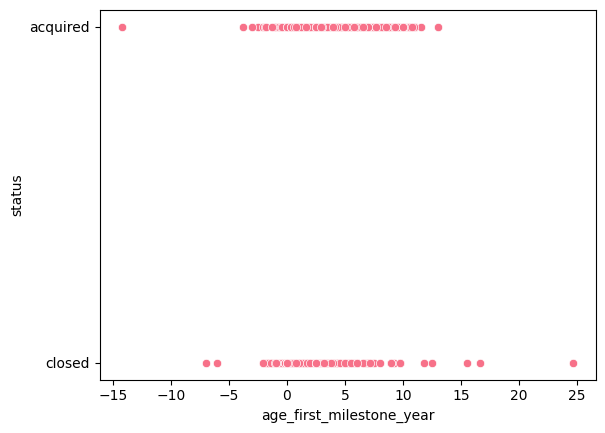

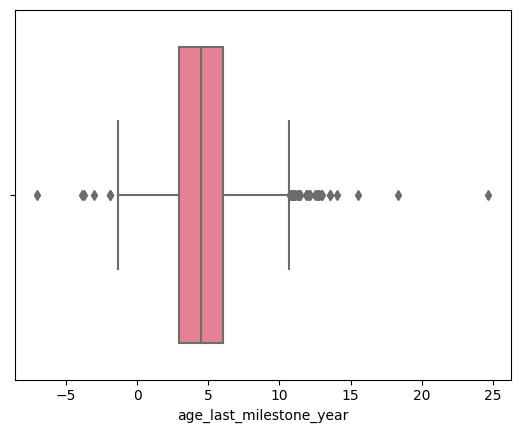

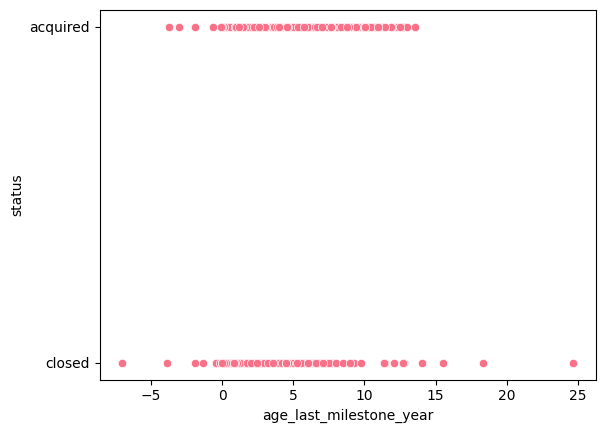

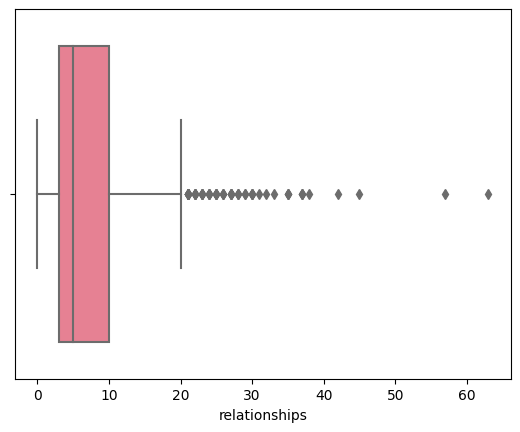

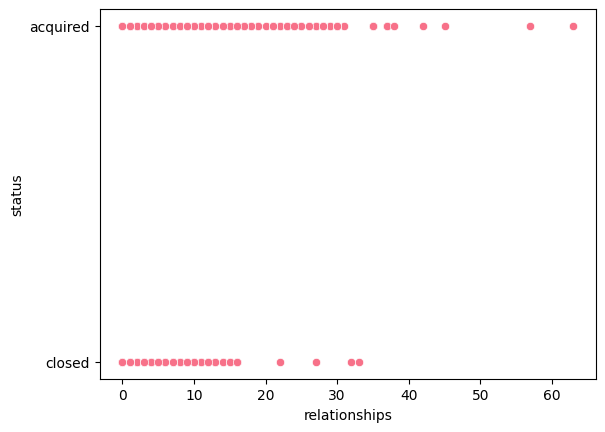

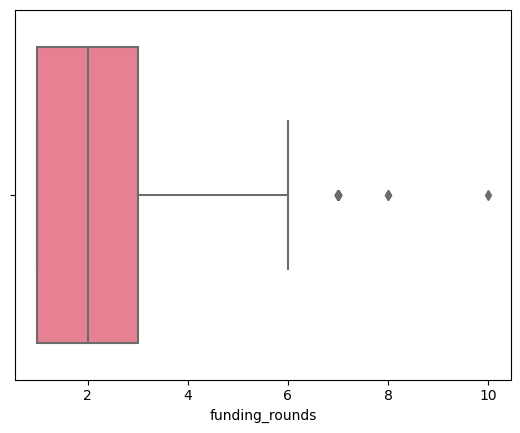

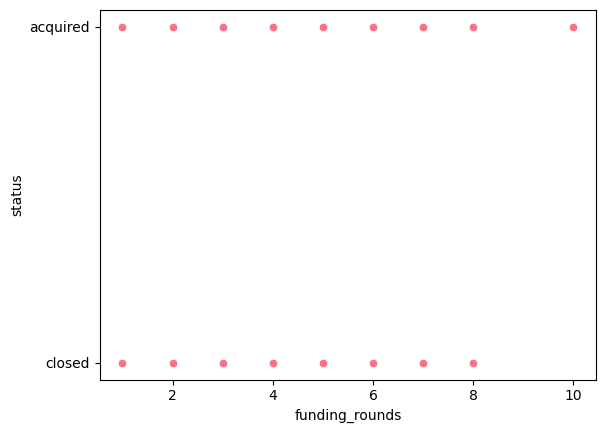

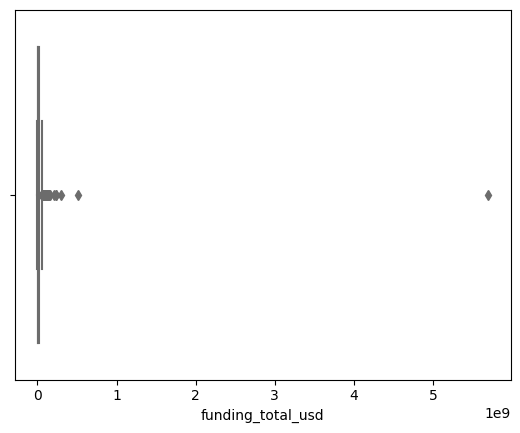

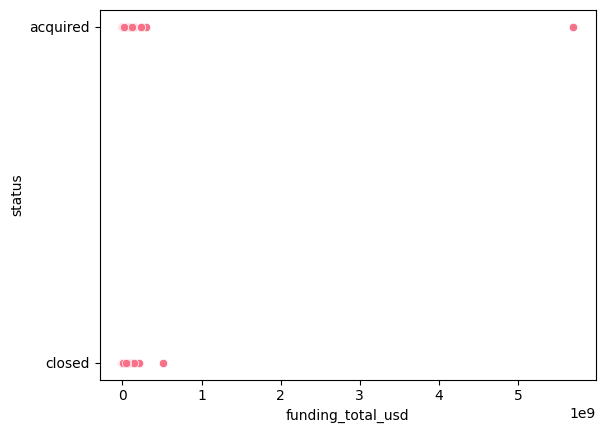

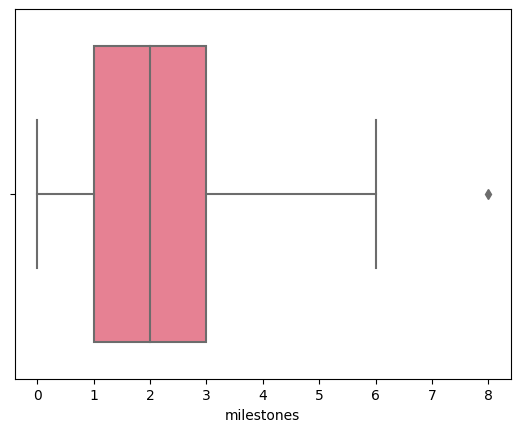

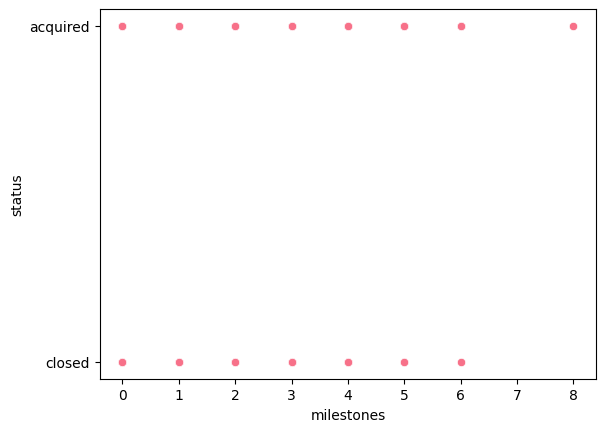

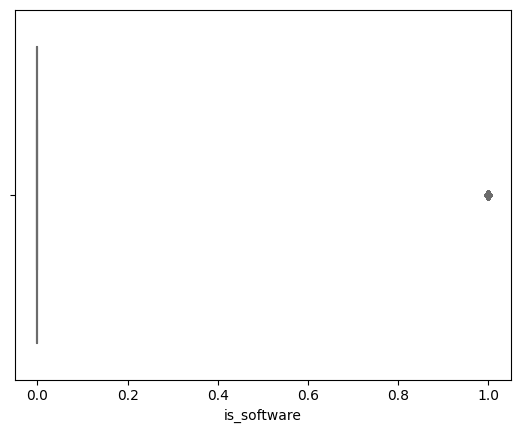

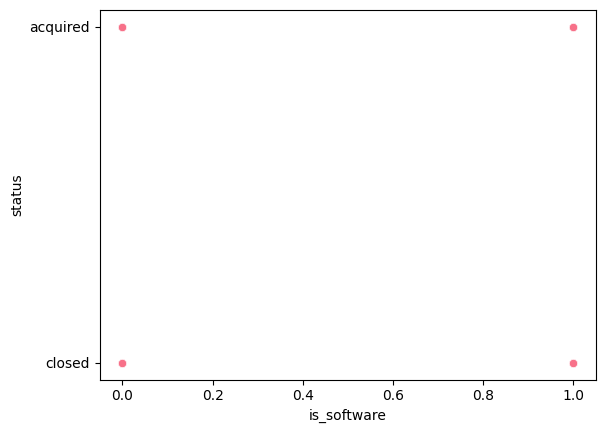

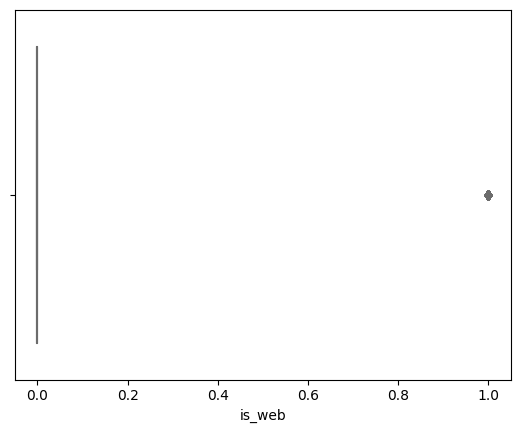

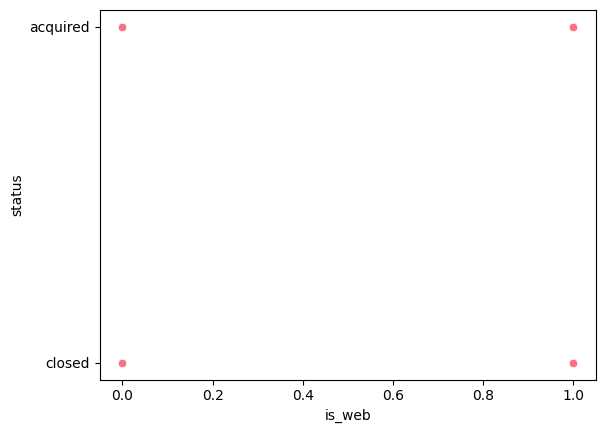

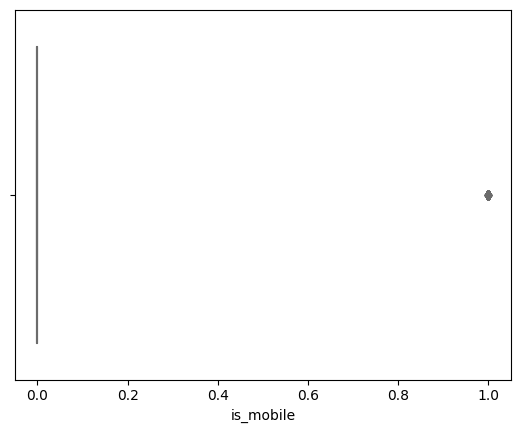

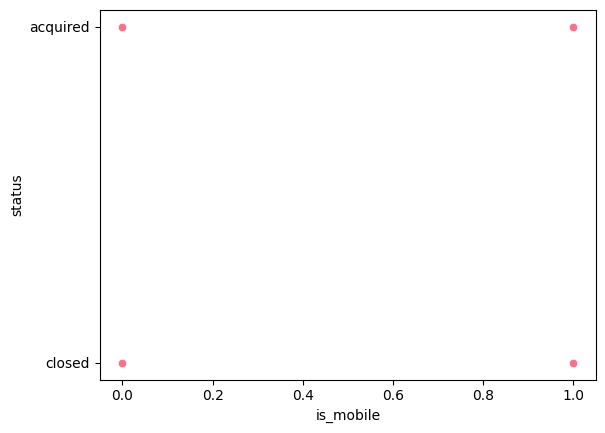

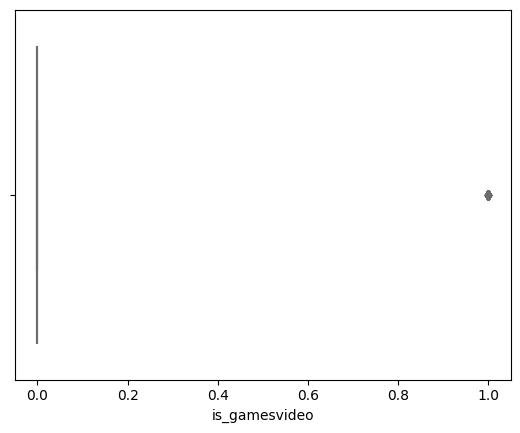

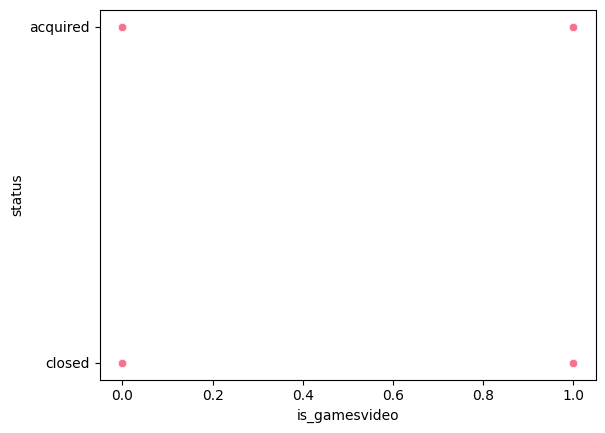

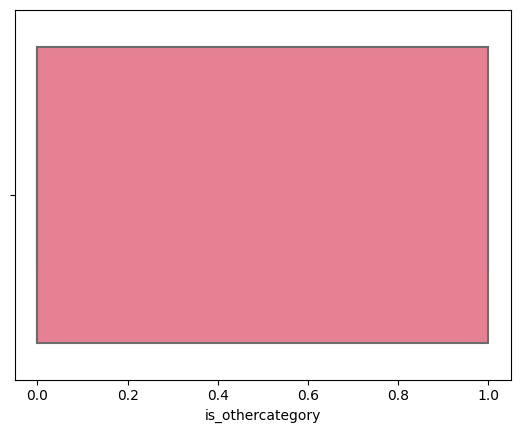

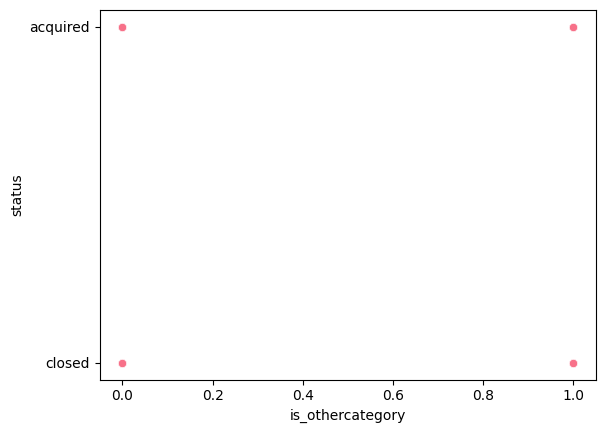

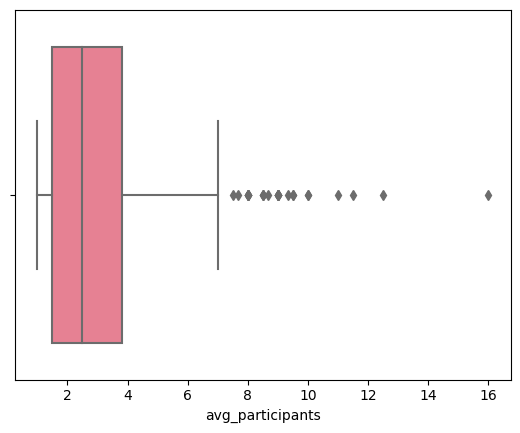

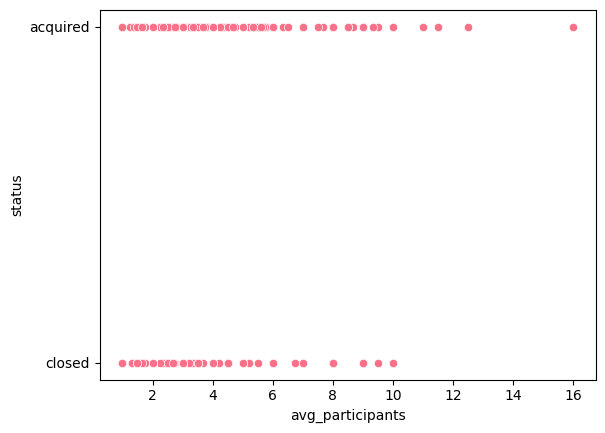

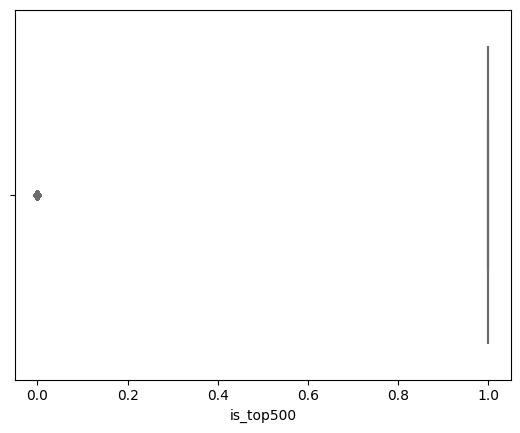

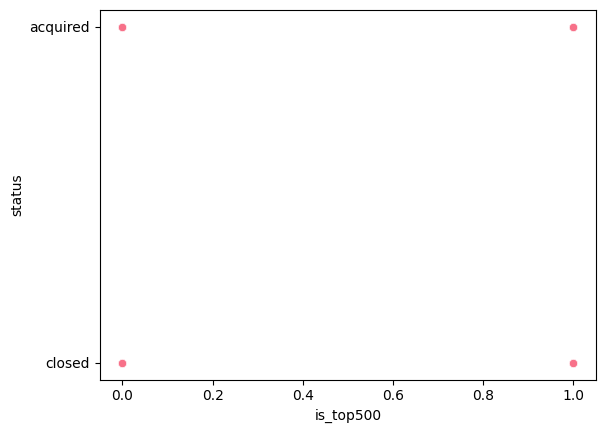

In [4910]:
for col in data.columns:
    if data[col].dtype != 'object':
        bp = sns.boxplot(data = data, x = col)
        plt.show()
        sp = sns.scatterplot(data = data, x = col, y=data["status"])
        plt.show()

In [4911]:
data.drop(data[data['latitude']>50].index, axis = 0, inplace =True)

In [4912]:
data.drop(data[data['latitude']<27].index, axis = 0, inplace =True)

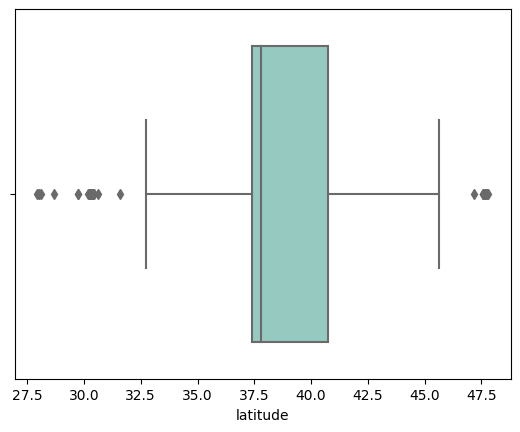

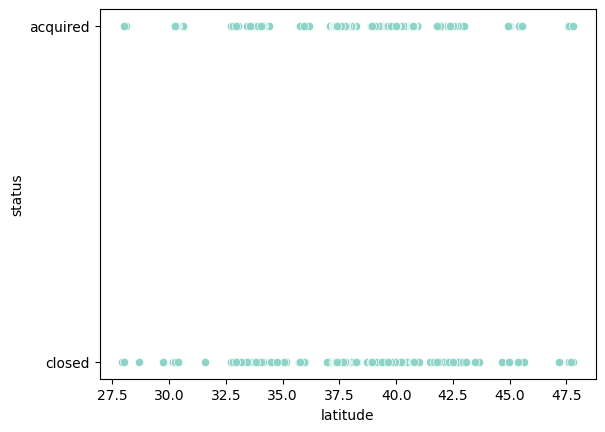

In [4913]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "latitude")
plt.show()
sp = sns.scatterplot(data = data, x = "latitude", y=data["status"])
plt.show()

In [4914]:
data.drop(data[data['longitude']>-60].index, axis = 0, inplace =True)

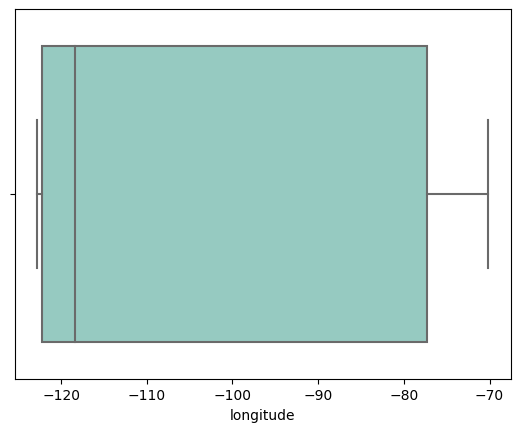

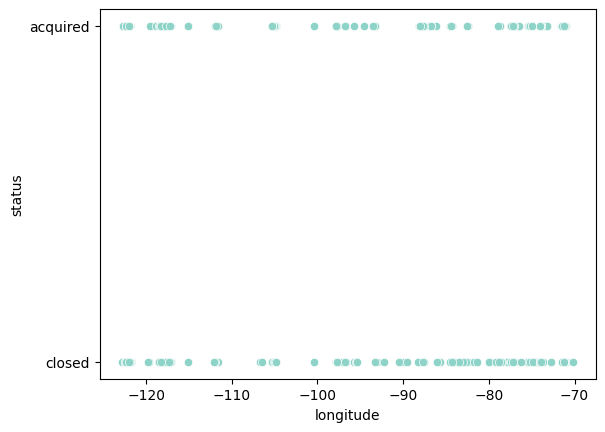

In [4915]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "longitude")
plt.show()
sp = sns.scatterplot(data = data, x = "longitude", y=data["status"])
plt.show()

In [4916]:
data.drop(data[data['age_first_funding_year']>15].index, axis = 0, inplace =True)

In [4917]:
data.drop(data[data['age_first_funding_year']<-5].index, axis = 0, inplace =True)

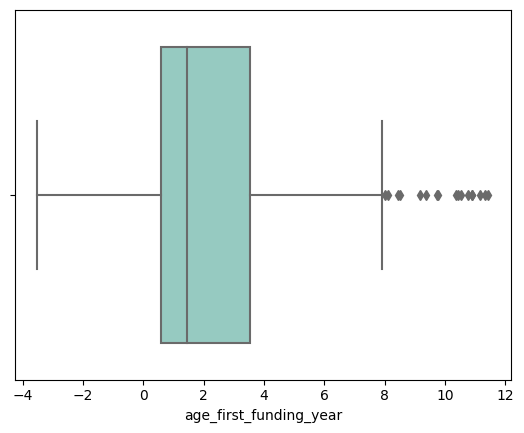

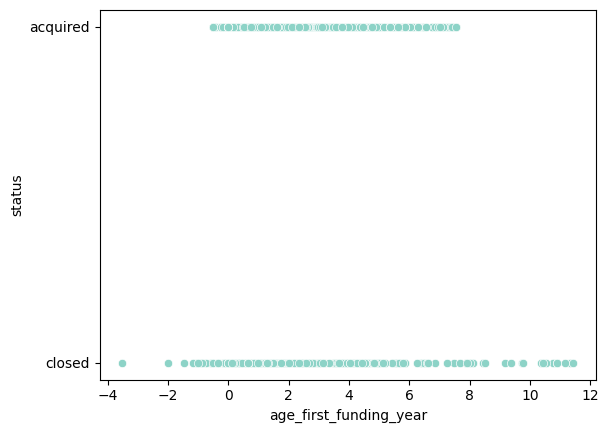

In [4918]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "age_first_funding_year")
plt.show()
sp = sns.scatterplot(data = data, x = "age_first_funding_year", y=data["status"])
plt.show()

In [4919]:
data.drop(data[data['age_last_funding_year']>13].index, axis = 0, inplace =True)

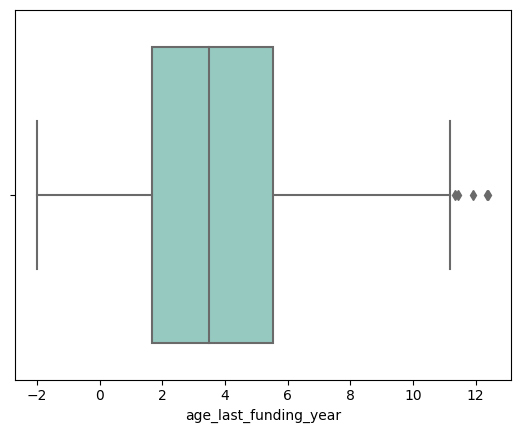

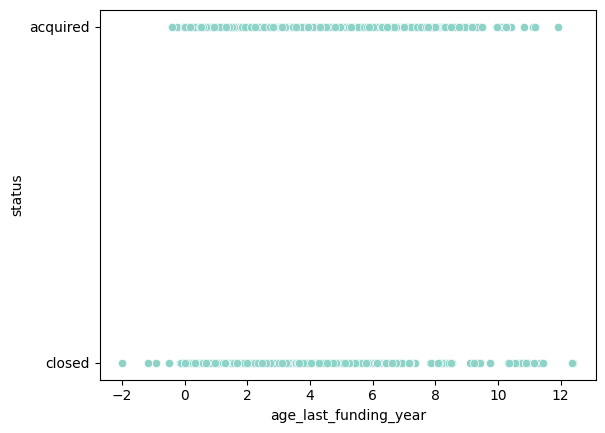

In [4920]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "age_last_funding_year")
plt.show()
sp = sns.scatterplot(data = data, x = "age_last_funding_year", y=data["status"])
plt.show()

In [4921]:
data.drop(data[data['age_first_milestone_year']<-10].index, axis = 0, inplace =True)

In [4922]:
data.drop(data[data['age_first_milestone_year']>17].index, axis = 0, inplace =True)

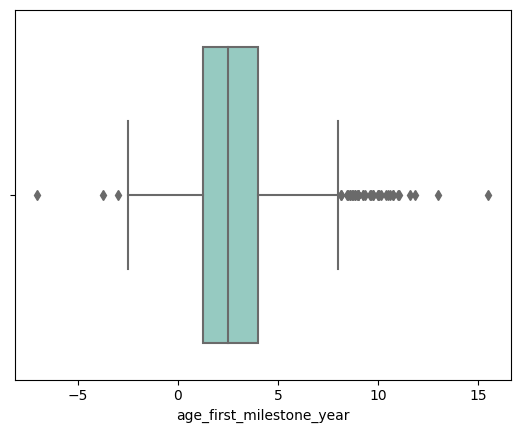

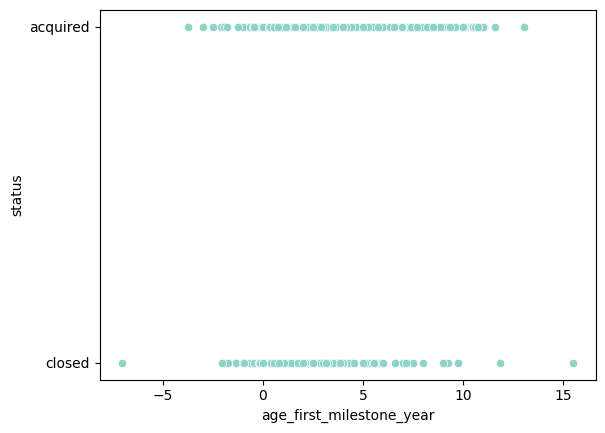

In [4923]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "age_first_milestone_year")
plt.show()
sp = sns.scatterplot(data = data, x = "age_first_milestone_year", y=data["status"])
plt.show()

In [4924]:
data.drop(data[data['age_last_milestone_year']<-5].index, axis = 0, inplace =True)

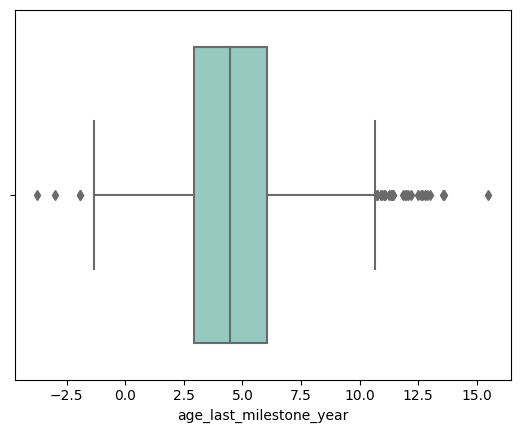

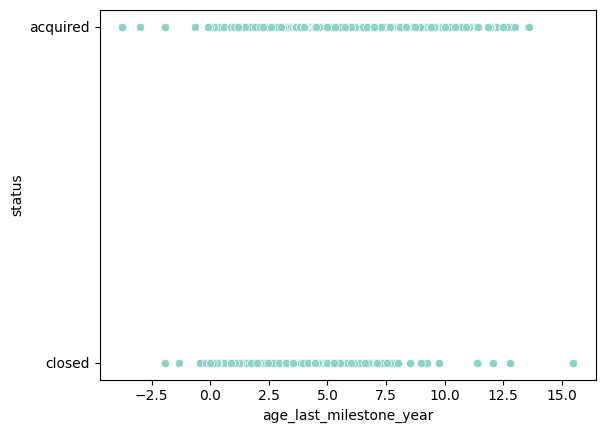

In [4925]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "age_last_milestone_year")
plt.show()
sp = sns.scatterplot(data = data, x = "age_last_milestone_year", y=data["status"])
plt.show()

In [4926]:
data.drop(data[data['relationships']>40].index, axis = 0, inplace =True)

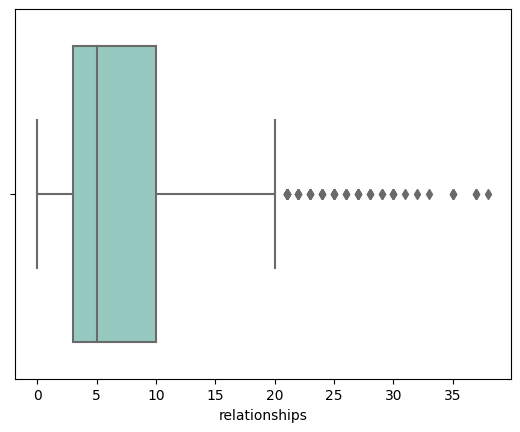

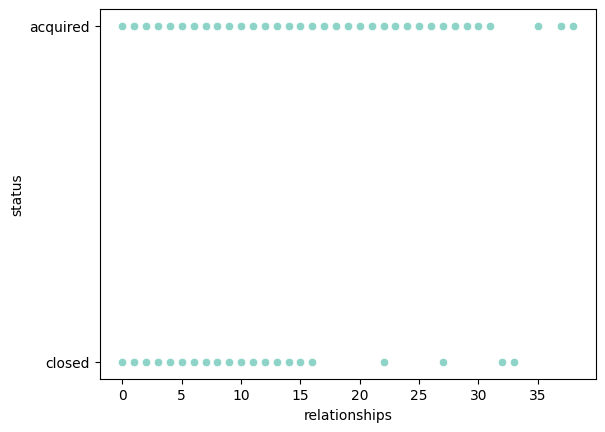

In [4927]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "relationships")
plt.show()
sp = sns.scatterplot(data = data, x = "relationships", y=data["status"])
plt.show()

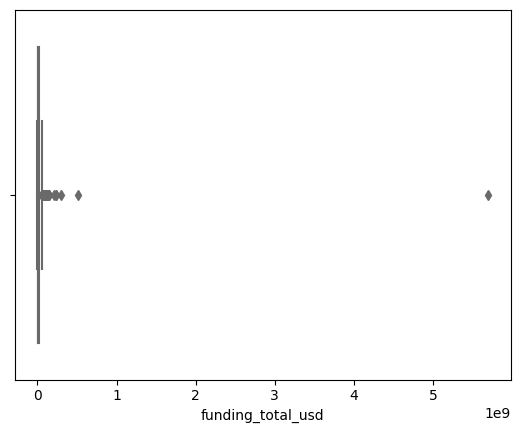

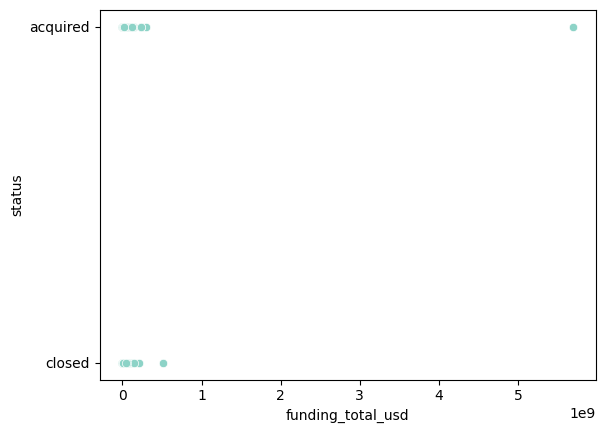

In [4928]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "funding_total_usd")
plt.show()
sp = sns.scatterplot(data = data, x = "funding_total_usd", y=data["status"])
plt.show()

In [4929]:
data["funding_total_usd"]

0        375000
1      40100000
2       2600000
3      40000000
4       1300000
         ...   
918     1100000
919    52000000
920    44000000
921    15500000
922    20000000
Name: funding_total_usd, Length: 902, dtype: int64

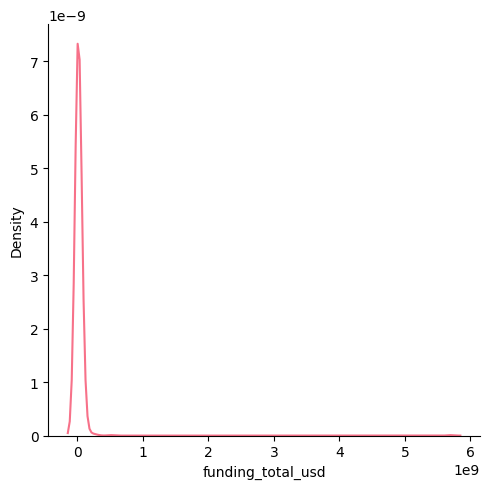

In [4930]:
sns.set_palette("husl")
sns.displot(data=data, x="funding_total_usd", kind="kde")

In [4931]:
data.drop(data[data['funding_total_usd']>200000000].index, axis = 0, inplace =True)

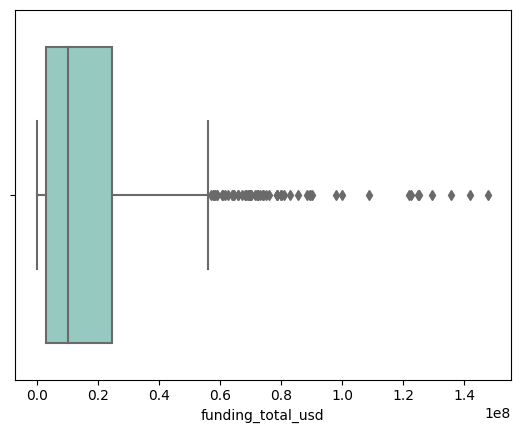

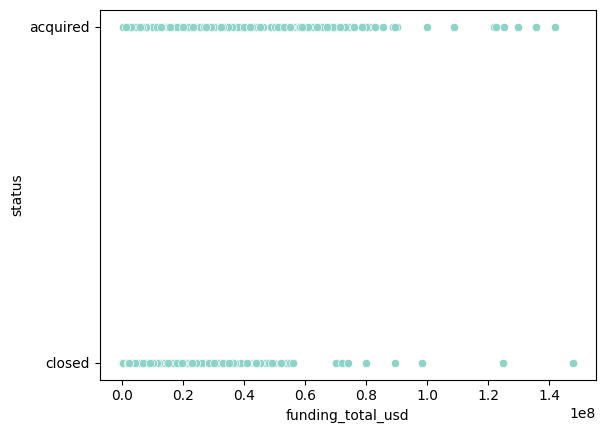

In [4932]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "funding_total_usd")
plt.show()
sp = sns.scatterplot(data = data, x = "funding_total_usd", y=data["status"])
plt.show()

**scale**

In [4933]:
data.loc[(data['is_software'] == 0) &
         (data['is_web'] == 0) &
         (data['is_mobile'] == 0) &
         (data['is_gamesvideo'] == 0), 'is_othercategory'] = 1

In [4934]:
data

,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,is_web,is_mobile,is_gamesvideo,is_othercategory,avg_participants,is_top500,status
0,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,0,0,0,1,1.0000,0,acquired
1,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,0,0,0,1,4.7500,1,acquired
2,32.901049,-117.192656,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,1,0,0,0,4.0000,1,acquired
3,37.320309,-122.050040,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,1,0,0,0,0,3.3333,1,acquired
4,37.779281,-122.419236,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,0,0,0,1,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,San Francisco,CoTweet,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,advertising,0,0,0,0,1,6.0000,1,acquired
919,42.504817,-71.195611,Burlington,Reef Point Systems,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,security,0,0,0,0,1,2.6667,1,closed
920,37.408261,-122.015920,Sunnyvale,Paracor Medical,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,biotech,0,0,0,0,1,8.0000,1,closed
921,37.556732,-122.288378,San Francisco,Causata,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,software,1,0,0,0,0,1.0000,1,acquired


In [4935]:
data.dtypes

latitude                    float64
longitude                   float64
city                         object
name                         object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_gamesvideo                 int64
is_othercategory              int64
avg_participants            float64
is_top500                     int64
status                       object
dtype: object

In [4936]:
le =LabelEncoder()
data["city"] = le.fit_transform(data["city"])
data["name"] = le.fit_transform(data["name"])
data["category_code"] = le.fit_transform(data["category_code"])

In [4937]:
data["status"]=(data["status"]=='acquired').astype(int)

In [4938]:
data.dtypes

latitude                    float64
longitude                   float64
city                          int64
name                          int64
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
category_code                 int64
is_software                   int64
is_web                        int64
is_mobile                     int64
is_gamesvideo                 int64
is_othercategory              int64
avg_participants            float64
is_top500                     int64
status                        int64
dtype: object

In [4939]:
data

,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,is_web,is_mobile,is_gamesvideo,is_othercategory,avg_participants,is_top500,status
0,42.358880,-71.056820,168,72,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,19,0,0,0,0,1,1.0000,0,1
1,37.238916,-121.973718,106,758,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,8,0,0,0,0,1,4.7500,1,1
2,32.901049,-117.192656,168,567,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,34,0,1,0,0,0,4.0000,1,1
3,37.320309,-122.050040,54,690,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,30,1,0,0,0,0,3.3333,1,1
4,37.779281,-122.419236,169,339,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,11,0,0,0,1,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,169,148,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,0,0,0,0,0,1,6.0000,1,1
919,42.504817,-71.195611,34,603,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,27,0,0,0,0,1,2.6667,1,0
920,37.408261,-122.015920,186,539,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,3,0,0,0,0,1,8.0000,1,0
921,37.556732,-122.288378,169,129,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,30,1,0,0,0,0,1.0000,1,1


# Logistic_Model

In [4940]:
scaler = MinMaxScaler()

In [4941]:
X = data.drop(columns = ['status'])
y = data['status'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 30)

In [4942]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4943]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [4944]:
# Probabilities of acquired
y_pred2 = reg.predict_proba(X_test)[:,1]
# If probability is higher than 0.5, it means the startup will be acquired
churn_decision = (y_pred2 >= 0.5)

In [4945]:
reg.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0])

In [4946]:
pred = reg.predict(X_test)
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.51      0.58        83
           1       0.80      0.90      0.85       186

    accuracy                           0.78       269
   macro avg       0.75      0.70      0.72       269
weighted avg       0.77      0.78      0.77       269



In [4947]:
reg.score(X_test,y_test)

0.7769516728624535

# Decision Tree Model

In [4948]:
X = data.drop(columns = ['status'])
y = data['status'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 30)

In [4949]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4950]:
dt_clf = DecisionTreeClassifier(max_depth = 4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [4951]:
dt_pred = dt_clf.predict(X_test)
dt_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0])

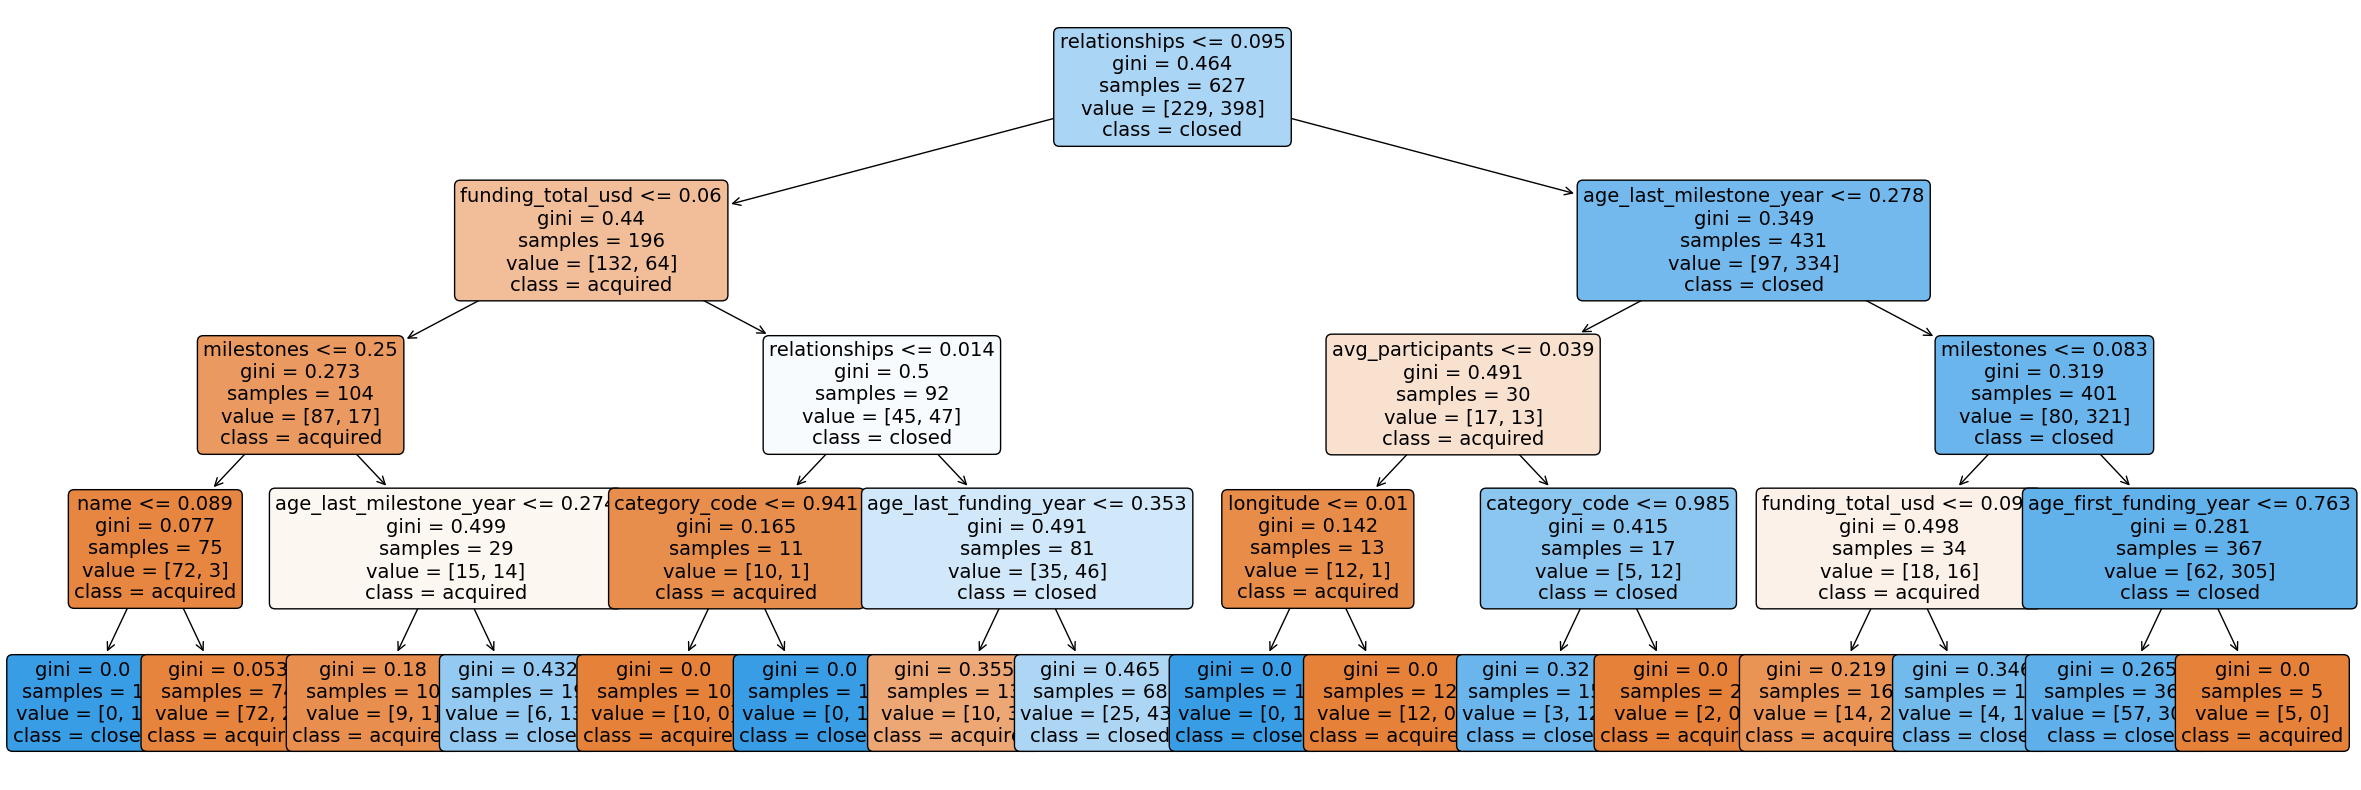

In [4952]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='white')
#create the tree plot
a = tree.plot_tree(dt_clf,
                   #use the feature names stored
                   feature_names = data.columns[:-1],
                   #use the class names stored
                   class_names = ['acquired', 'closed'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [4953]:
print(metrics.classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.51      0.69      0.58        61
           1       0.90      0.80      0.85       208

    accuracy                           0.78       269
   macro avg       0.70      0.75      0.72       269
weighted avg       0.81      0.78      0.79       269



In [4954]:
accuracy_score(y_test, dt_pred)

0.7769516728624535

# Random Forest

In [4955]:
X2 = data.drop(columns = ['status'])
y2 = data['status'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size = 0.30, random_state = 30)

In [4956]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4957]:
rf_clf = RandomForestClassifier(max_depth =40, random_state = 30)
rf_clf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=40, random_state=30)

In [4958]:
rf_pred = rf_clf.predict(X_test2)
rf_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0])

In [4959]:
print(metrics.classification_report(rf_pred,y_test2))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69        70
           1       0.91      0.85      0.88       199

    accuracy                           0.83       269
   macro avg       0.77      0.80      0.79       269
weighted avg       0.84      0.83      0.83       269



In [4960]:
accuracy_score(y_test2, rf_pred)

0.8252788104089219